# Chess Games Predictive Model

In this notebook, A Dataframe of more than 20 thousand chess games was selected to be studied and put as basis of creating a Predictive model for chess games outcome based on multiple input variables.

1. First - EDA - Necessary for cleaning unimportant data and creating new meaningful Data.

2. Secondly - Visualisation - Important data visualisation for determining important features for the predictive model: 
    * Comparing Victors to Victory Status.
    * Comparing Victors to Advantage Types.
    * Comparing Victors to Opening Types.
    * Comparing Victors to Increment Mode.
    * Comparing Victors to Rating Titles.
    
3. Thirdly - Predictive Model 

    Defining libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
chess = pd.read_csv('./chess_game_dataset/games.csv')

## EDA

### Cleaning Dataframe

In [3]:
chess.describe()

created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000

In [4]:
chess.head()

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3  
3  Queen's Pawn Game: Zukertort Variation            3  
4                        Philidor Defense            5

    Dropping unnecessary columns

In [5]:
cols_to_drop = ['id', 'created_at', 'last_move_at', 'white_id', 'black_id', 'opening_eco', 'opening_ply', 'rated']
chess = chess.drop(columns=cols_to_drop)
print('Number of games now: ', chess.shape[0])
chess.head(5)


Number of games now:  20058


turns victory_status winner increment_code  white_rating  black_rating  \
0     13      outoftime  white           15+2          1500          1191   
1     16         resign  black           5+10          1322          1261   
2     61           mate  white           5+10          1496          1500   
3     61           mate  white           20+0          1439          1454   
4     95           mate  white           30+3          1523          1469   

                                               moves  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

                             opening_name  
0        Slav Defense: Exchange Variation  
1  Nimzowitsch Defense: Kennedy Variation  
2   King's Pawn Game: Leonardis Variation  
3  Queen's Pawn Game: Zukertort Variation  
4                        Philidor Defense

    Removing games with less than 3 moves

In [6]:
chess = chess.loc[chess.turns > 3]
print('Number of games now: ', chess.shape[0])

Number of games now:  19768


In [7]:
chess.head()

turns victory_status winner increment_code  white_rating  black_rating  \
0     13      outoftime  white           15+2          1500          1191   
1     16         resign  black           5+10          1322          1261   
2     61           mate  white           5+10          1496          1500   
3     61           mate  white           20+0          1439          1454   
4     95           mate  white           30+3          1523          1469   

                                               moves  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

                             opening_name  
0        Slav Defense: Exchange Variation  
1  Nimzowitsch Defense: Kennedy Variation  
2   King's Pawn Game: Leonardis Variation  
3  Queen's Pawn Game: Zukertort Variation  
4                        Philidor Defense

### Working on Ratings

    Creating Rating Difference column

In [8]:
chess['rating_difference'] = chess['white_rating'] - chess['black_rating']
chess['rating_difference'].abs()

0        309
1         61
2          4
3         15
4         54
        ... 
20053    471
20054     37
20055     67
20056    133
20057    104
Name: rating_difference, Length: 19768, dtype: int64

    Calculating Rating difference & assigning rating difference title

In [9]:
def assign_rating_title(rating_difference: int):
    if rating_difference <= - 100:
        return 'Black Advantage'
    
    elif rating_difference > 100:
        return 'White Advantage'

    else:
        return 'Goodmatch'

chess['rating_difference_title'] = chess['rating_difference'].apply(lambda rating_difference: assign_rating_title(rating_difference))

    Assigning player's category for each player according to rating 

In [10]:
def assign_white_rating_title(white_rating: int):
    
    if white_rating <= 1000:
        return 'Beginner'
    
    elif 1000 < white_rating < 1300:
        return 'Amateur'

    elif 1300 <= white_rating < 1500:
        return 'Intermediate'
    
    elif 1500 <= white_rating < 1700:
        return 'Semi-Pro'

    elif 1700 <= white_rating < 2000:
        return 'Pro'        

    else:
        return 'Master'

def assign_black_rating_title(black_rating: int):
    
    if black_rating <= 1000:
        return 'Beginner'
    
    elif 1000 < black_rating < 1300:
        return 'Amateur'

    elif 1300 <= black_rating < 1500:
        return 'Intermediate'
    
    elif 1500 <= black_rating < 1700:
        return 'Semi-Pro'

    elif 1700 <= black_rating < 2000:
        return 'Pro'        

    else:
        return 'Master'

In [11]:
chess['white_rating_title'] = chess['white_rating'].apply(lambda white_rating: assign_white_rating_title(white_rating))
chess['black_rating_title'] = chess['black_rating'].apply(lambda black_rating: assign_black_rating_title(black_rating))

In [12]:
# chess_without_mismatch = chess.loc[chess.rating_difference_title != 'Mismatch']
# print('Number of games now: ', chess_without_mismatch.shape[0])
# chess_without_mismatch.head()

### Working on Increment Modes

In [13]:
chess.increment_code.describe()
chess.increment_code.info()

<class 'pandas.core.series.Series'>
Int64Index: 19768 entries, 0 to 20057
Series name: increment_code
Non-Null Count  Dtype 
--------------  ----- 
19768 non-null  object
dtypes: object(1)
memory usage: 308.9+ KB


    Analyzing all increment values

In [14]:
print(chess['increment_code'].unique())

['15+2' '5+10' '20+0' '30+3' '10+0' '15+30' '15+0' '20+60' '5+40' '8+0'
 '15+15' '15+16' '11+0' '15+5' '10+10' '15+3' '18+0' '30+30' '20+25' '5+5'
 '30+0' '40+40' '16+0' '8+10' '8+12' '7+12' '15+10' '20+5' '20+10' '45+0'
 '5+8' '30+2' '25+0' '10+2' '7+2' '25+25' '7+8' '6+6' '10+4' '12+0' '15+1'
 '2+10' '9+0' '10+9' '6+7' '30+10' '30+15' '10+3' '45+30' '9+2' '7+3'
 '6+5' '25+5' '5+7' '8+2' '20+8' '30+5' '25+15' '15+7' '8+8' '5+9' '16+7'
 '10+7' '7+5' '40+20' '10+5' '11+5' '10+15' '180+0' '17+5' '8+5' '3+8'
 '60+120' '90+120' '15+8' '9+1' '9+3' '6+10' '2+15' '10+1' '5+12' '60+10'
 '5+60' '8+15' '30+25' '12+1' '14+0' '60+20' '10+8' '20+3' '14+12' '7+7'
 '60+0' '45+45' '4+15' '5+6' '180+180' '8+3' '4+6' '10+25' '3+10' '7+4'
 '6+3' '5+15' '45+15' '15+20' '6+8' '6+9' '14+8' '6+4' '15+4' '9+20'
 '20+15' '20+2' '9+10' '8+7' '13+1' '3+12' '7+10' '5+30' '20+30' '14+10'
 '25+10' '8+1' '19+0' '9+12' '20+1' '0+25' '0+15' '15+6' '8+6' '10+6'
 '25+8' '15+14' '20+20' '13+10' '10+60' '3+9' '17+11' '12+

    Classifying multiple values into main Categories

In [15]:
def assign_increment_mode(increment_code: str):
    if (increment_code.startswith('1+') | increment_code.startswith('2')):
        return 'Bullet'
    
    elif (increment_code.startswith('3+') | increment_code.startswith('4+') | increment_code.startswith('5+') | increment_code.startswith('6+')
            | increment_code.startswith('7+') | increment_code.startswith('8+') | increment_code.startswith('9+')):
        return 'Blitz'

    elif (increment_code.startswith('10+') | increment_code.startswith('11+') | increment_code.startswith('12+') | increment_code.startswith('13+')
            | increment_code.startswith('15+')):
            return 'Rapid'

    else:
        return 'Classical'

chess['increment_code_mode'] = chess['increment_code'].apply(lambda increment_code: assign_increment_mode(increment_code))

    Data shape after EDA

In [16]:
chess.head()

turns victory_status winner increment_code  white_rating  black_rating  \
0     13      outoftime  white           15+2          1500          1191   
1     16         resign  black           5+10          1322          1261   
2     61           mate  white           5+10          1496          1500   
3     61           mate  white           20+0          1439          1454   
4     95           mate  white           30+3          1523          1469   

                                               moves  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

                             opening_name  rating_difference  \
0        Slav Defense: Exchange Variation                309   
1  Nimzowitsch Defense: Kennedy Variation                 61   
2   King's Pawn Game: Leonardis Variation                 -4   
3  Queen's Pawn Game: Zukertort Variation                -15   
4                        Philidor Defense                 54   

  rating_difference_title white_rating_title black_rating_title  \
0         White Advantage           Semi-Pro            Amateur   
1               Goodmatch       Intermediate            Amateur   
2               Goodmatch       Intermediate           Semi-Pro   
3               Goodmatch       Intermediate       Intermediate   
4               Goodmatch           Semi-Pro       Intermediate   

  increment_code_mode  
0               Rapid  
1               Blitz  
2               Blitz  
3              Bullet  
4           Classical

## Visualizing Results

### Comparing Victors to Victory Status

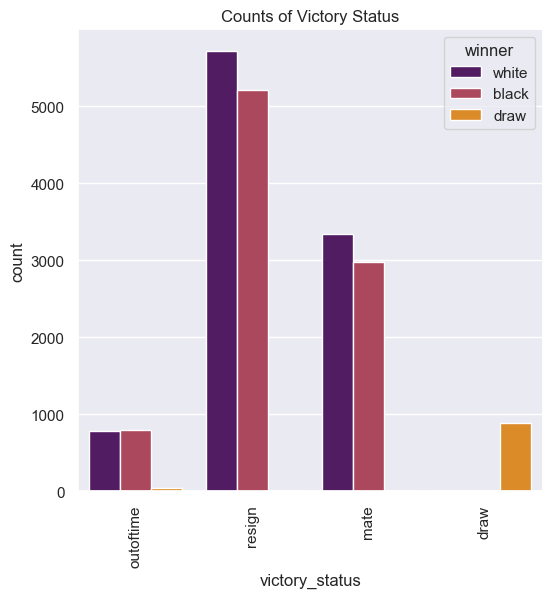

In [17]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.countplot(data=chess, x='victory_status', hue='winner', palette='inferno').set(title='Counts of Victory Status')
plt.xticks(rotation = 90)
plt.show()

In [18]:
fig = px.histogram(chess, x='victory_status', color='winner', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

### Comparing Victors to Advantage Type

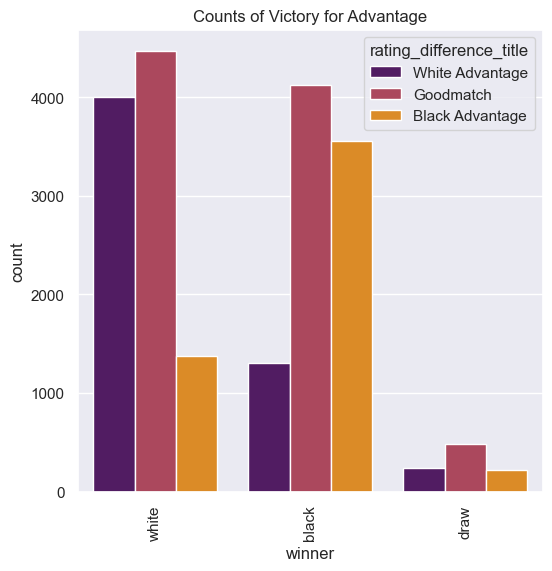

In [19]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.countplot(data=chess, x='winner', hue='rating_difference_title', palette='inferno').set(title='Counts of Victory for Advantage')
plt.xticks(rotation = 90)
plt.show()

In [20]:
fig = px.histogram(chess, x='winner', color='rating_difference_title', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

### Comparing Victors to Opening Type

In [21]:
fig = px.histogram(data_frame = chess ,x = 'opening_name').update_xaxes(categoryorder='total descending')
fig.show()

In [22]:
fig = px.histogram(chess, x='winner', color='opening_name', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

In [23]:
df = chess.groupby(['opening_name', 'winner']).size().to_frame().sort_values([0], ascending = False).head(30).reset_index()
df.head(30)

opening_name winner    0
0                            Van't Kruijs Opening  black  211
1                                Sicilian Defense  black  185
2                Sicilian Defense: Bowdler Attack  black  164
3   Scandinavian Defense: Mieses-Kotroc Variation  white  164
4                                     Scotch Game  white  145
5                                Sicilian Defense  white  144
6                French Defense: Knight Variation  white  135
7                             Philidor Defense #3  white  127
8                French Defense: Knight Variation  black  121
9                Sicilian Defense: Bowdler Attack  white  119
10                Queen's Pawn Game: Mason Attack  white  116
11                                    Scotch Game  black  115
12                           Scandinavian Defense  black  113
13          Queen's Pawn Game: Chigorin Variation  white  111
14                           Van't Kruijs Opening  white  110
15          Queen's Pawn Game: Chigorin Variation  black  109
16                              Caro-Kann Defense  white  107
17                                Horwitz Defense  white  104
18                Queen's Pawn Game: Mason Attack  black  103
19                                    Indian Game  black  100
20         Italian Game: Anti-Fried Liver Defense  white   97
21                            Philidor Defense #2  black   96
22           Four Knights Game: Italian Variation  white   95
23                 Sicilian Defense: Old Sicilian  black   93
24                                Horwitz Defense  black   91
25                            Philidor Defense #2  white   89
26  Scandinavian Defense: Mieses-Kotroc Variation  black   89
27                                 Modern Defense  black   87
28       Queen's Gambit Refused: Marshall Defense  white   84
29                               Philidor Defense  white   84

In [24]:
fig = px.histogram(df, x='winner',y = 0, color='opening_name', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

### Comparing Victors to Increment Mode

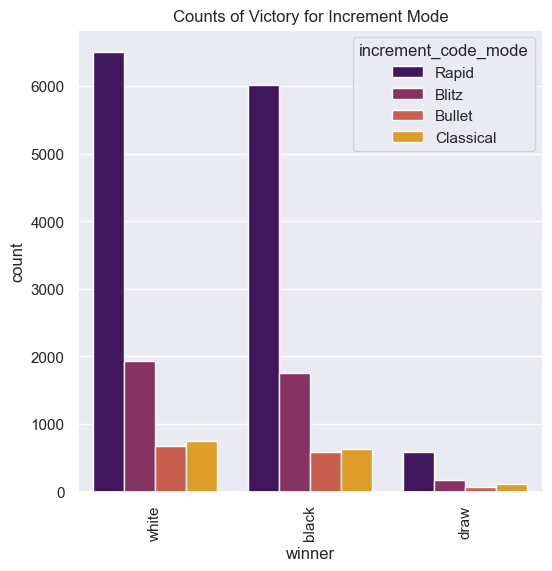

In [25]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.countplot(data=chess, x='winner', hue='increment_code_mode', palette='inferno').set(title='Counts of Victory for Increment Mode')
plt.xticks(rotation = 90)
plt.show()

In [26]:
fig = px.histogram(chess, x='winner', color='increment_code_mode', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

### Comparing Victors to Rating titles

In [27]:
fig = px.histogram(chess, x='winner', color='white_rating_title', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

In [28]:
fig = px.histogram(chess, x='winner', color='black_rating_title', template='plotly_dark', color_discrete_sequence = px.colors.qualitative.T10).update_xaxes(categoryorder='total descending')
fig.show()

## Predictive Model

    Importing Libraries

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import ppscore as pps

In [30]:
pps.predictors(chess, "winner")

x       y   ppscore            case  is_valid_score  \
0                     turns  winner  0.684257  classification            True   
1   rating_difference_title  winner  0.202469  classification            True   
2         rating_difference  winner  0.148196  classification            True   
3        black_rating_title  winner  0.092538  classification            True   
4        white_rating_title  winner  0.087396  classification            True   
5              opening_name  winner  0.078693  classification            True   
6              black_rating  winner  0.064988  classification            True   
7            victory_status  winner  0.000000  classification            True   
8            increment_code  winner  0.000000  classification            True   
9              white_rating  winner  0.000000  classification            True   
10                    moves  winner  0.000000  classification            True   
11      increment_code_mode  winner  0.000000  classification            True   

         metric  baseline_score  model_score                     model  
0   weighted F1          0.4584     0.828994  DecisionTreeClassifier()  
1   weighted F1          0.4584     0.568057  DecisionTreeClassifier()  
2   weighted F1          0.4584     0.538663  DecisionTreeClassifier()  
3   weighted F1          0.4584     0.508519  DecisionTreeClassifier()  
4   weighted F1          0.4584     0.505733  DecisionTreeClassifier()  
5   weighted F1          0.4584     0.501020  DecisionTreeClassifier()  
6   weighted F1          0.4584     0.493597  DecisionTreeClassifier()  
7   weighted F1          0.4584     0.383979  DecisionTreeClassifier()  
8   weighted F1          0.4584     0.431995  DecisionTreeClassifier()  
9   weighted F1          0.4584     0.454433  DecisionTreeClassifier()  
10  weighted F1          0.4584     0.346633  DecisionTreeClassifier()  
11  weighted F1          0.4584     0.364224  DecisionTreeClassifier()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'turns'),
  Text(1, 0, 'rating_difference_title'),
  Text(2, 0, 'rating_difference'),
  Text(3, 0, 'black_rating_title'),
  Text(4, 0, 'white_rating_title'),
  Text(5, 0, 'opening_name'),
  Text(6, 0, 'black_rating'),
  Text(7, 0, 'victory_status'),
  Text(8, 0, 'increment_code'),
  Text(9, 0, 'white_rating'),
  Text(10, 0, 'moves'),
  Text(11, 0, 'increment_code_mode')])

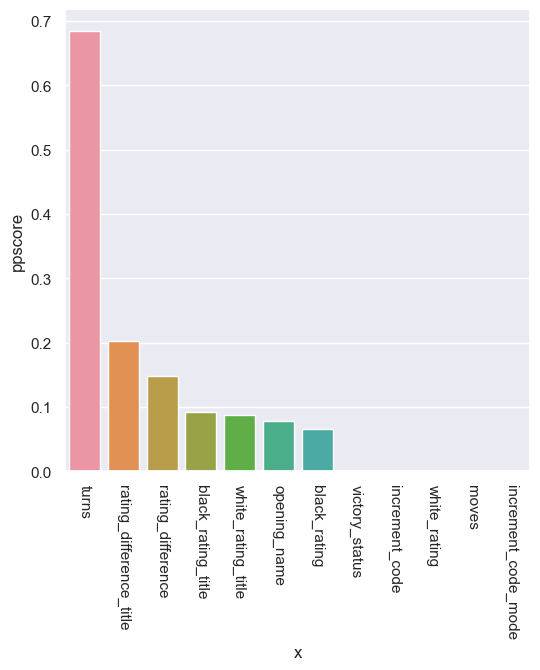

In [31]:
predictors_df = pps.predictors(chess, y="winner")
sns.barplot(data=predictors_df, x="x", y="ppscore")
plt.xticks(rotation=-90)

In [35]:
def plot_kde(variable: str, color: str):

    plt.figure(figsize=(10, 6))

    sns.kdeplot(data=chess, x=variable, hue=color, multiple='stack', palette='tab10')

    plt.xlabel(variable, fontdict={'fontsize': 16})
    
    plt.ylabel('')

    plt.show()

In [39]:
chess.head()

turns victory_status winner increment_code  white_rating  black_rating  \
0     13      outoftime  white           15+2          1500          1191   
1     16         resign  black           5+10          1322          1261   
2     61           mate  white           5+10          1496          1500   
3     61           mate  white           20+0          1439          1454   
4     95           mate  white           30+3          1523          1469   

                                               moves  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

                             opening_name  rating_difference  \
0        Slav Defense: Exchange Variation                309   
1  Nimzowitsch Defense: Kennedy Variation                 61   
2   King's Pawn Game: Leonardis Variation                 -4   
3  Queen's Pawn Game: Zukertort Variation                -15   
4                        Philidor Defense                 54   

  rating_difference_title white_rating_title black_rating_title  \
0         White Advantage           Semi-Pro            Amateur   
1               Goodmatch       Intermediate            Amateur   
2               Goodmatch       Intermediate           Semi-Pro   
3               Goodmatch       Intermediate       Intermediate   
4               Goodmatch           Semi-Pro       Intermediate   

  increment_code_mode  
0               Rapid  
1               Blitz  
2               Blitz  
3              Bullet  
4           Classical

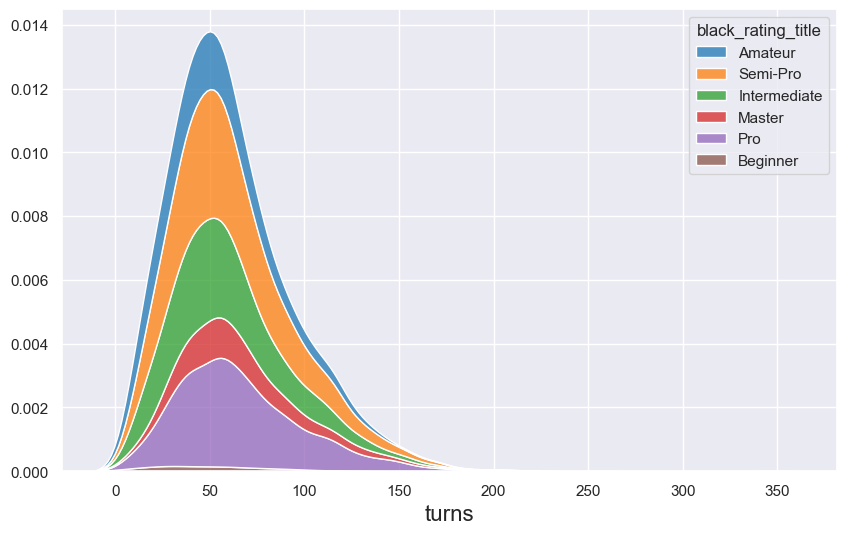

In [38]:
plot_kde('turns', 'black_rating_title')

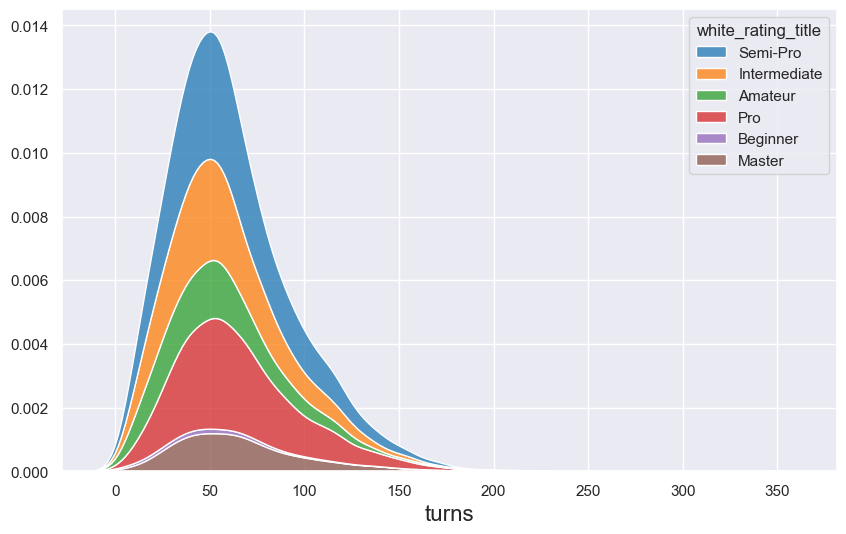

In [40]:
plot_kde('turns', 'white_rating_title')

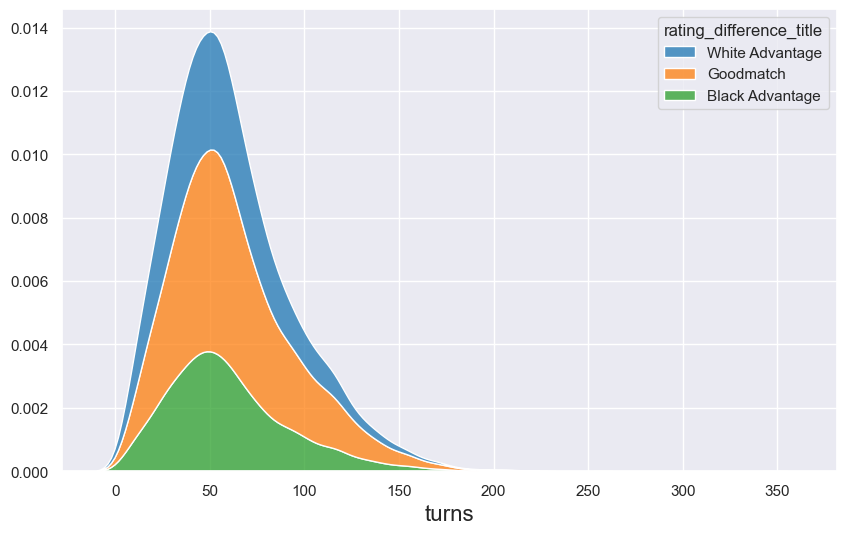

In [41]:
plot_kde('turns', 'rating_difference_title')

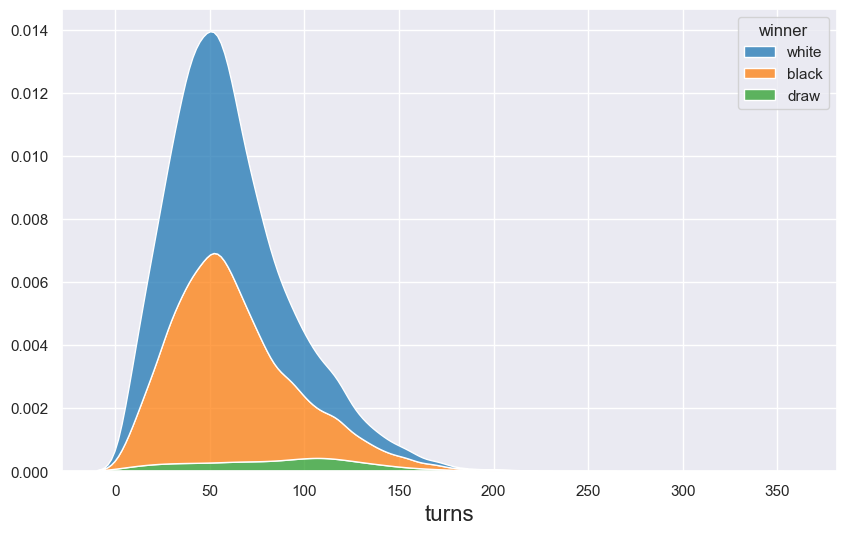

In [43]:
plot_kde('turns', 'winner')

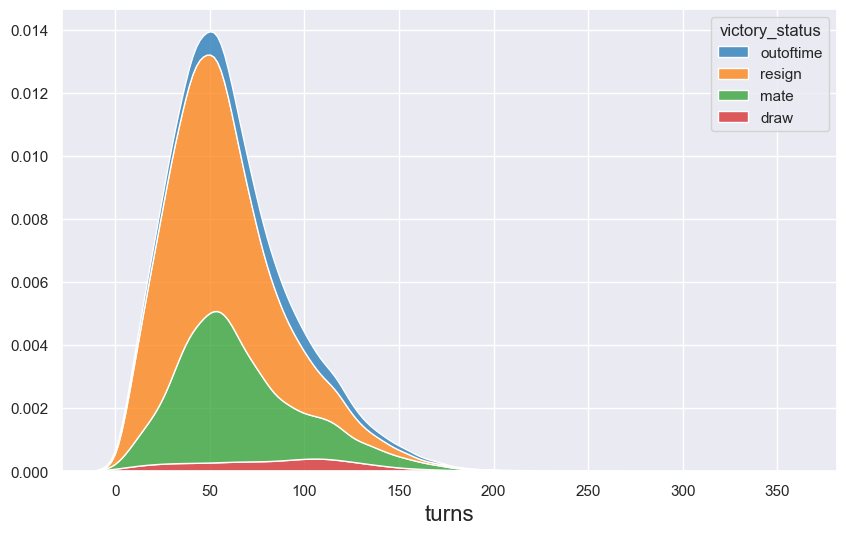

In [46]:
plot_kde('turns', 'victory_status')